In [45]:
from datasets import load_dataset
import pandas as pd 

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 


1. Extract data from a CSV file.

2. Transform the data (clean, preprocess, and engineer features).
 - Make sure to understand the data types and understand how you will deal with them. 

3. Load the transformed data into a database (SQLite for simplicity).

4. Analyze key insights with dashboarding metrics.

5. Build a Streamlit dashboard to showcase insights.


### Think about what kind of business questions you can answer with the data.

### What kind of metrics can you calculate to answer these questions?

### What kind of visualizations can you create to answer these questions?

### What kind of models can you use to predict the answers to these questions?



# 1. Load Data 

In [12]:
ds = load_dataset("kraina/airbnb", "all")

ds

DatasetDict({
    train: Dataset({
        features: ['_id', 'city', 'realSum', 'room_type', 'room_shared', 'room_private', 'person_capacity', 'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat', 'day_type'],
        num_rows: 51707
    })
})

In [13]:
df = ds['train'].to_pandas()
df


,_id,city,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,day_type
0,0,Amsterdam,194.033698,Private room,False,True,2.0,False,1,0,...,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,weekdays
1,1,Amsterdam,344.245776,Private room,False,True,4.0,False,0,0,...,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,weekdays
2,2,Amsterdam,264.101422,Private room,False,True,2.0,False,0,1,...,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,weekdays
3,3,Amsterdam,433.529398,Private room,False,True,4.0,False,0,1,...,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,weekdays
4,4,Amsterdam,485.552926,Private room,False,True,2.0,True,0,0,...,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,51702,Vienna,715.938574,Entire home/apt,False,False,6.0,False,0,1,...,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,weekends
51703,51703,Vienna,304.793960,Entire home/apt,False,False,2.0,False,0,0,...,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,weekends
51704,51704,Vienna,637.168969,Entire home/apt,False,False,2.0,False,0,0,...,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,weekends
51705,51705,Vienna,301.054157,Private room,False,True,2.0,False,0,0,...,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,weekends


# 2. Overview of Data 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         51707 non-null  object 
 1   city                        51707 non-null  object 
 2   realSum                     51707 non-null  float64
 3   room_type                   51707 non-null  object 
 4   room_shared                 51707 non-null  bool   
 5   room_private                51707 non-null  bool   
 6   person_capacity             51707 non-null  float64
 7   host_is_superhost           51707 non-null  bool   
 8   multi                       51707 non-null  int64  
 9   biz                         51707 non-null  int64  
 10  cleanliness_rating          51707 non-null  float64
 11  guest_satisfaction_overall  51707 non-null  float64
 12  bedrooms                    51707 non-null  int64  
 13  dist                        517

In [15]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


### There are no missing values in the dataset. 

In [16]:
def unique_columns(df):
    for col in df.columns:
        uniques = df[col].unique()
        print(f"Number of Unique values: {len(uniques)}")
        print(f"Unique Values: {col}\n:{uniques}\n")

In [17]:
unique_columns(df)

Number of Unique values: 51707
Unique Values: _id
:['0' '1' '2' ... '51704' '51705' '51706']

Number of Unique values: 10
Unique Values: city
:['Amsterdam' 'Athens' 'Barcelona' 'Berlin' 'Budapest' 'Lisbon' 'London'
 'Paris' 'Rome' 'Vienna']

Number of Unique values: 10497
Unique Values: realSum
:[194.03369812 344.24577602 264.10142245 ... 715.93857373 637.16896898
 301.05415702]

Number of Unique values: 3
Unique Values: room_type
:['Private room' 'Entire home/apt' 'Shared room']

Number of Unique values: 2
Unique Values: room_shared
:[False  True]

Number of Unique values: 2
Unique Values: room_private
:[ True False]

Number of Unique values: 5
Unique Values: person_capacity
:[2. 4. 3. 6. 5.]

Number of Unique values: 2
Unique Values: host_is_superhost
:[False  True]

Number of Unique values: 2
Unique Values: multi
:[1 0]

Number of Unique values: 2
Unique Values: biz
:[0 1]

Number of Unique values: 9
Unique Values: cleanliness_rating
:[10.  8.  9.  6.  7.  5.  4.  2.  3.]

Number of

### Some analysis I can conduct: 

#### Price Analysis 
 - How does the price change for each booking in regards to city center distance, metro distance, attraction index, overall guest satisfaction score, restaurant index and cleanliness rating?
 - Average prices compared to each city?
 - Impact of superhost on price? 
 - What is the biggest determinant of price? 
 - Price difference between weekdays or weekends? 

#### Guest Satisfaction Scores
 - How are the superhost ratings compared to those that aren't? 
 - What room types receives overall guest satisfaction score?
 - What attributes do super hosts have in common? 
 - How is user satisfaction influenced given the number of bookings a host has? 

### Location based
 - Where are listings located the most in touristic destinations or urban spaces? 
 - The layout of listings in the city

In [36]:
# Calculate correlation coefficients between price and the factors
key_factors = ['dist', 'metro_dist', 'attr_index_norm', 
                        'rest_index_norm', 'guest_satisfaction_overall', 
                        'cleanliness_rating']

correlations = df[['realSum'] + key_factors].corr()['realSum'].sort_values(ascending=False)
print("Correlation with Price (realSum):")
print(correlations)


Correlation with Price (realSum):
realSum                       1.000000
attr_index_norm               0.292396
rest_index_norm               0.144094
guest_satisfaction_overall   -0.001888
cleanliness_rating           -0.006082
dist                         -0.044725
metro_dist                   -0.061025
Name: realSum, dtype: float64


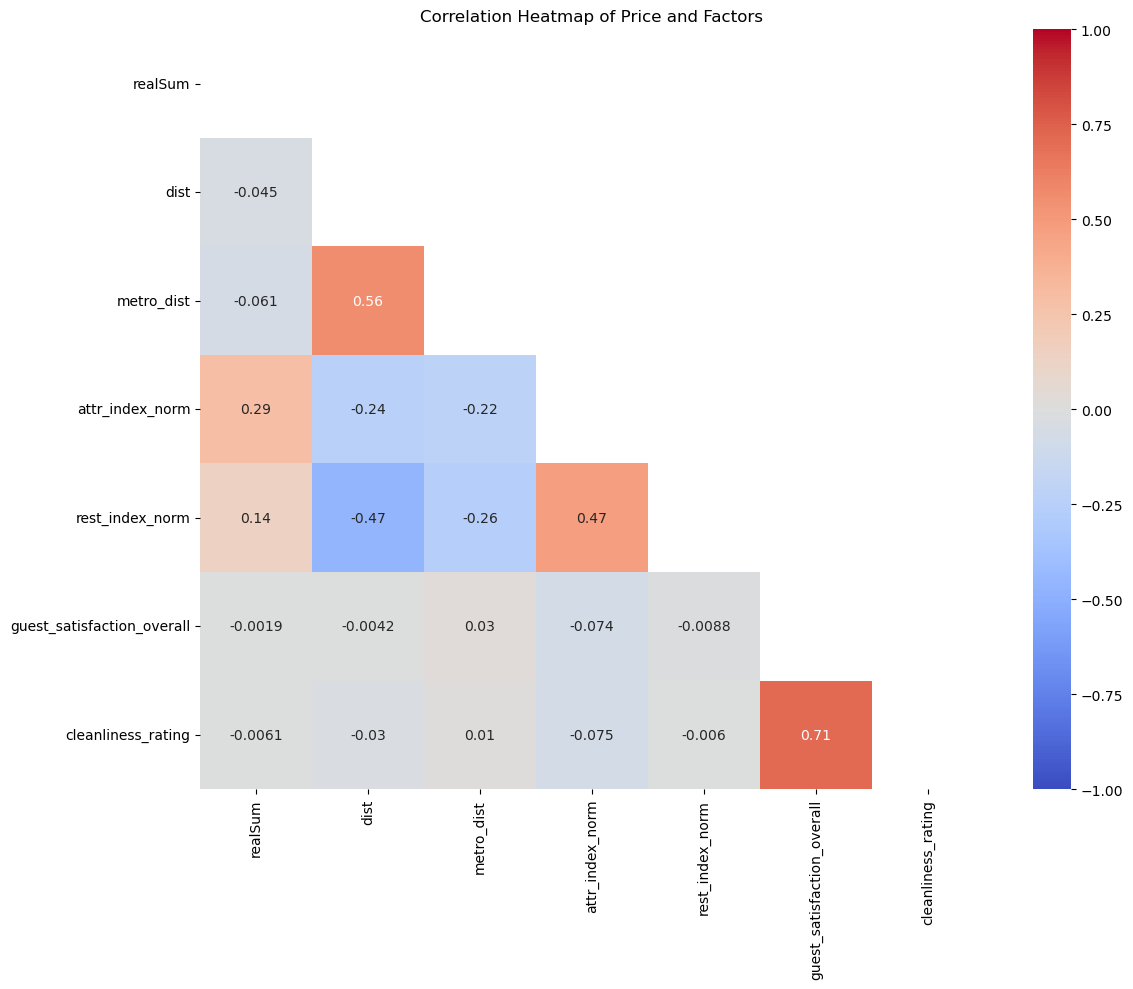

In [37]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df[['realSum'] + key_factors].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.title('Correlation Heatmap of Price and Factors')
plt.tight_layout()
plt.show()

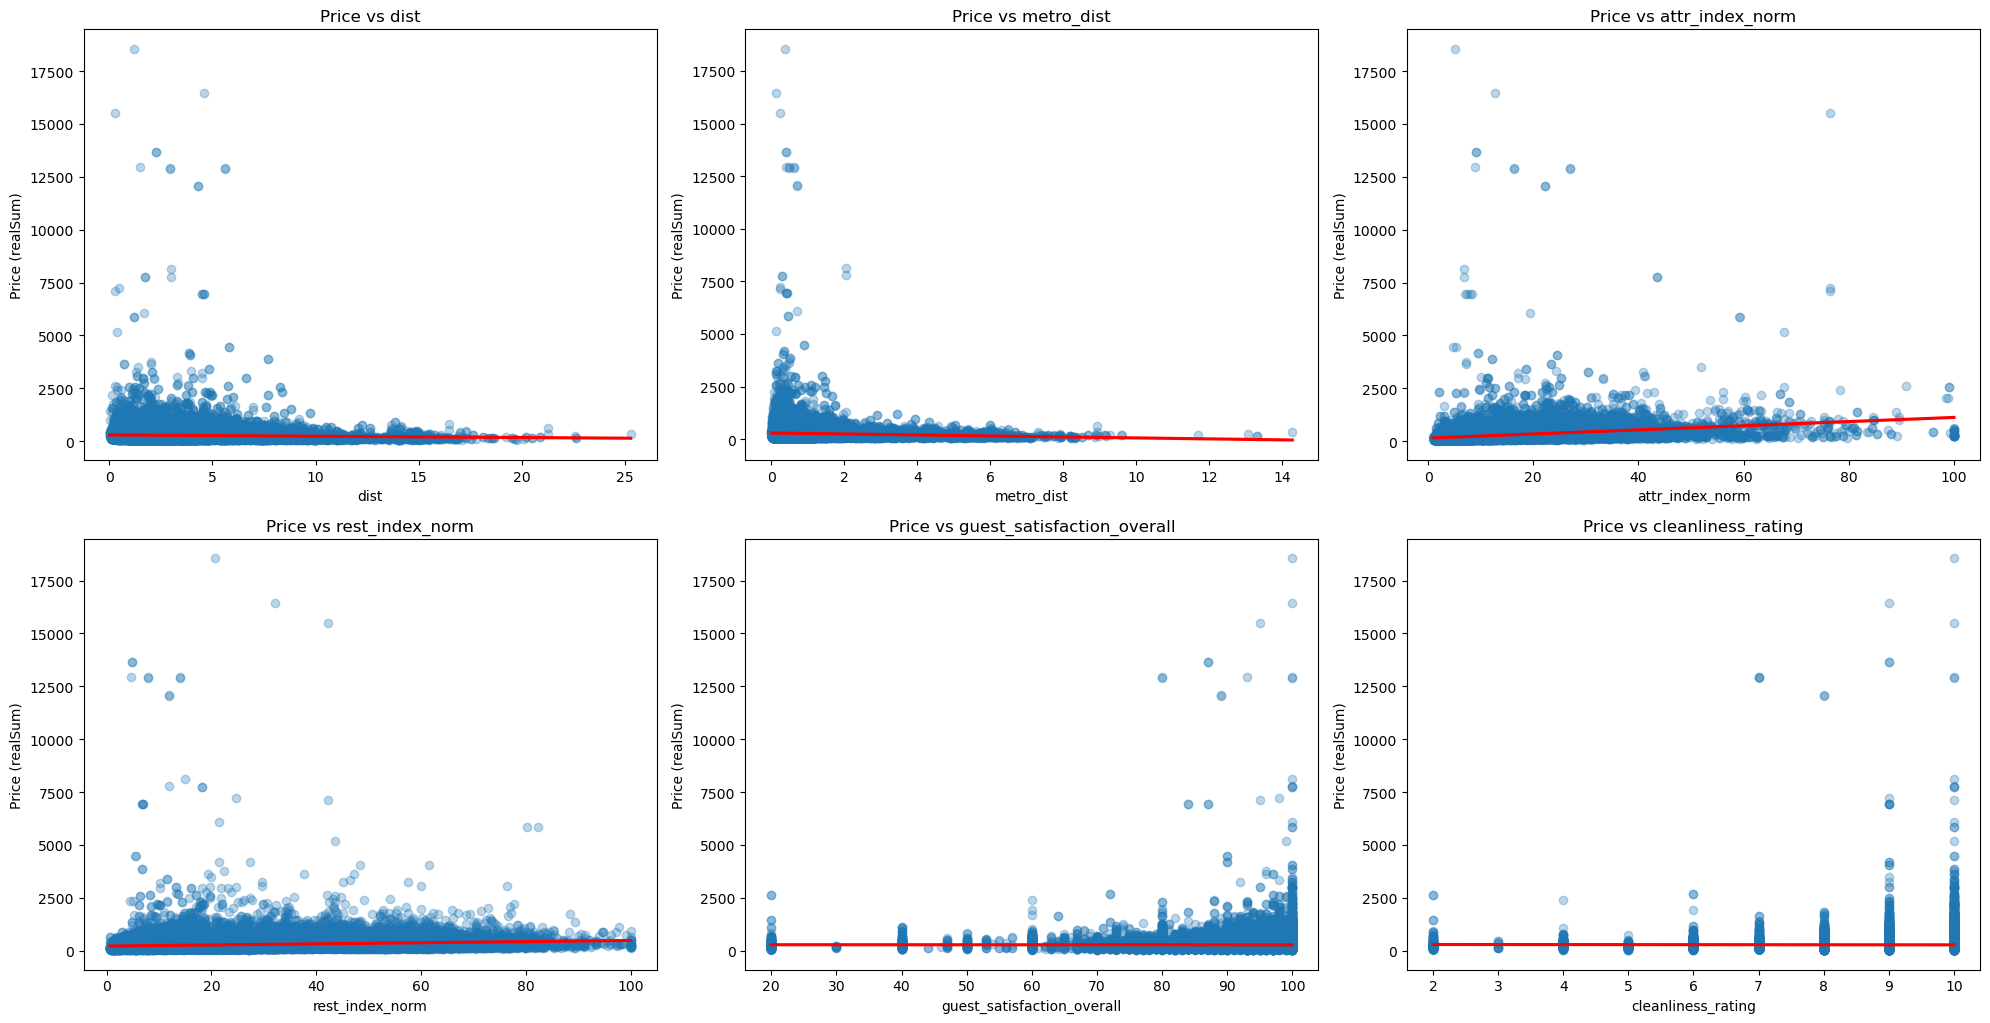

In [42]:
# Create scatter plots with regression lines for each factor
plt.figure(figsize=(20, 15))
for i, factor in enumerate(key_factors):
    plt.subplot(3, 3, i+1)
    sns.regplot(x=factor, y='realSum', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title(f'Price vs {factor}')
    plt.ylabel('Price (realSum)')
    plt.tight_layout()
plt.show()


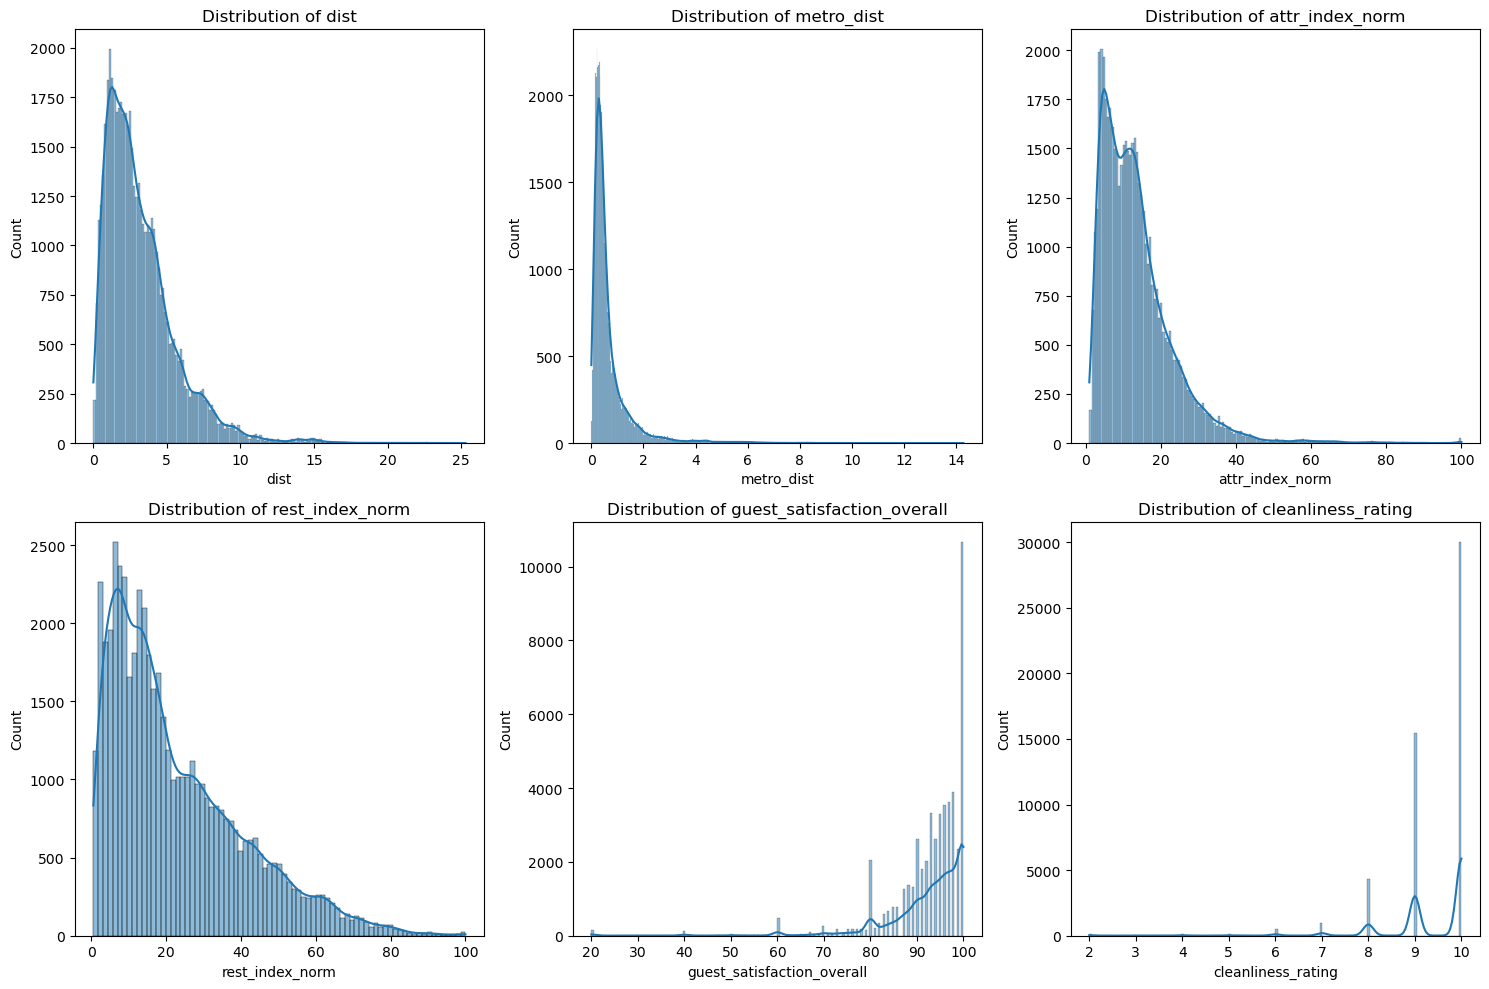

In [39]:
# 3. Distribution of each factor (to better understand the data)
plt.figure(figsize=(15, 10))
for i, factor in enumerate(key_factors):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[factor], kde=True)
    plt.title(f'Distribution of {factor}')
plt.tight_layout()
plt.show()


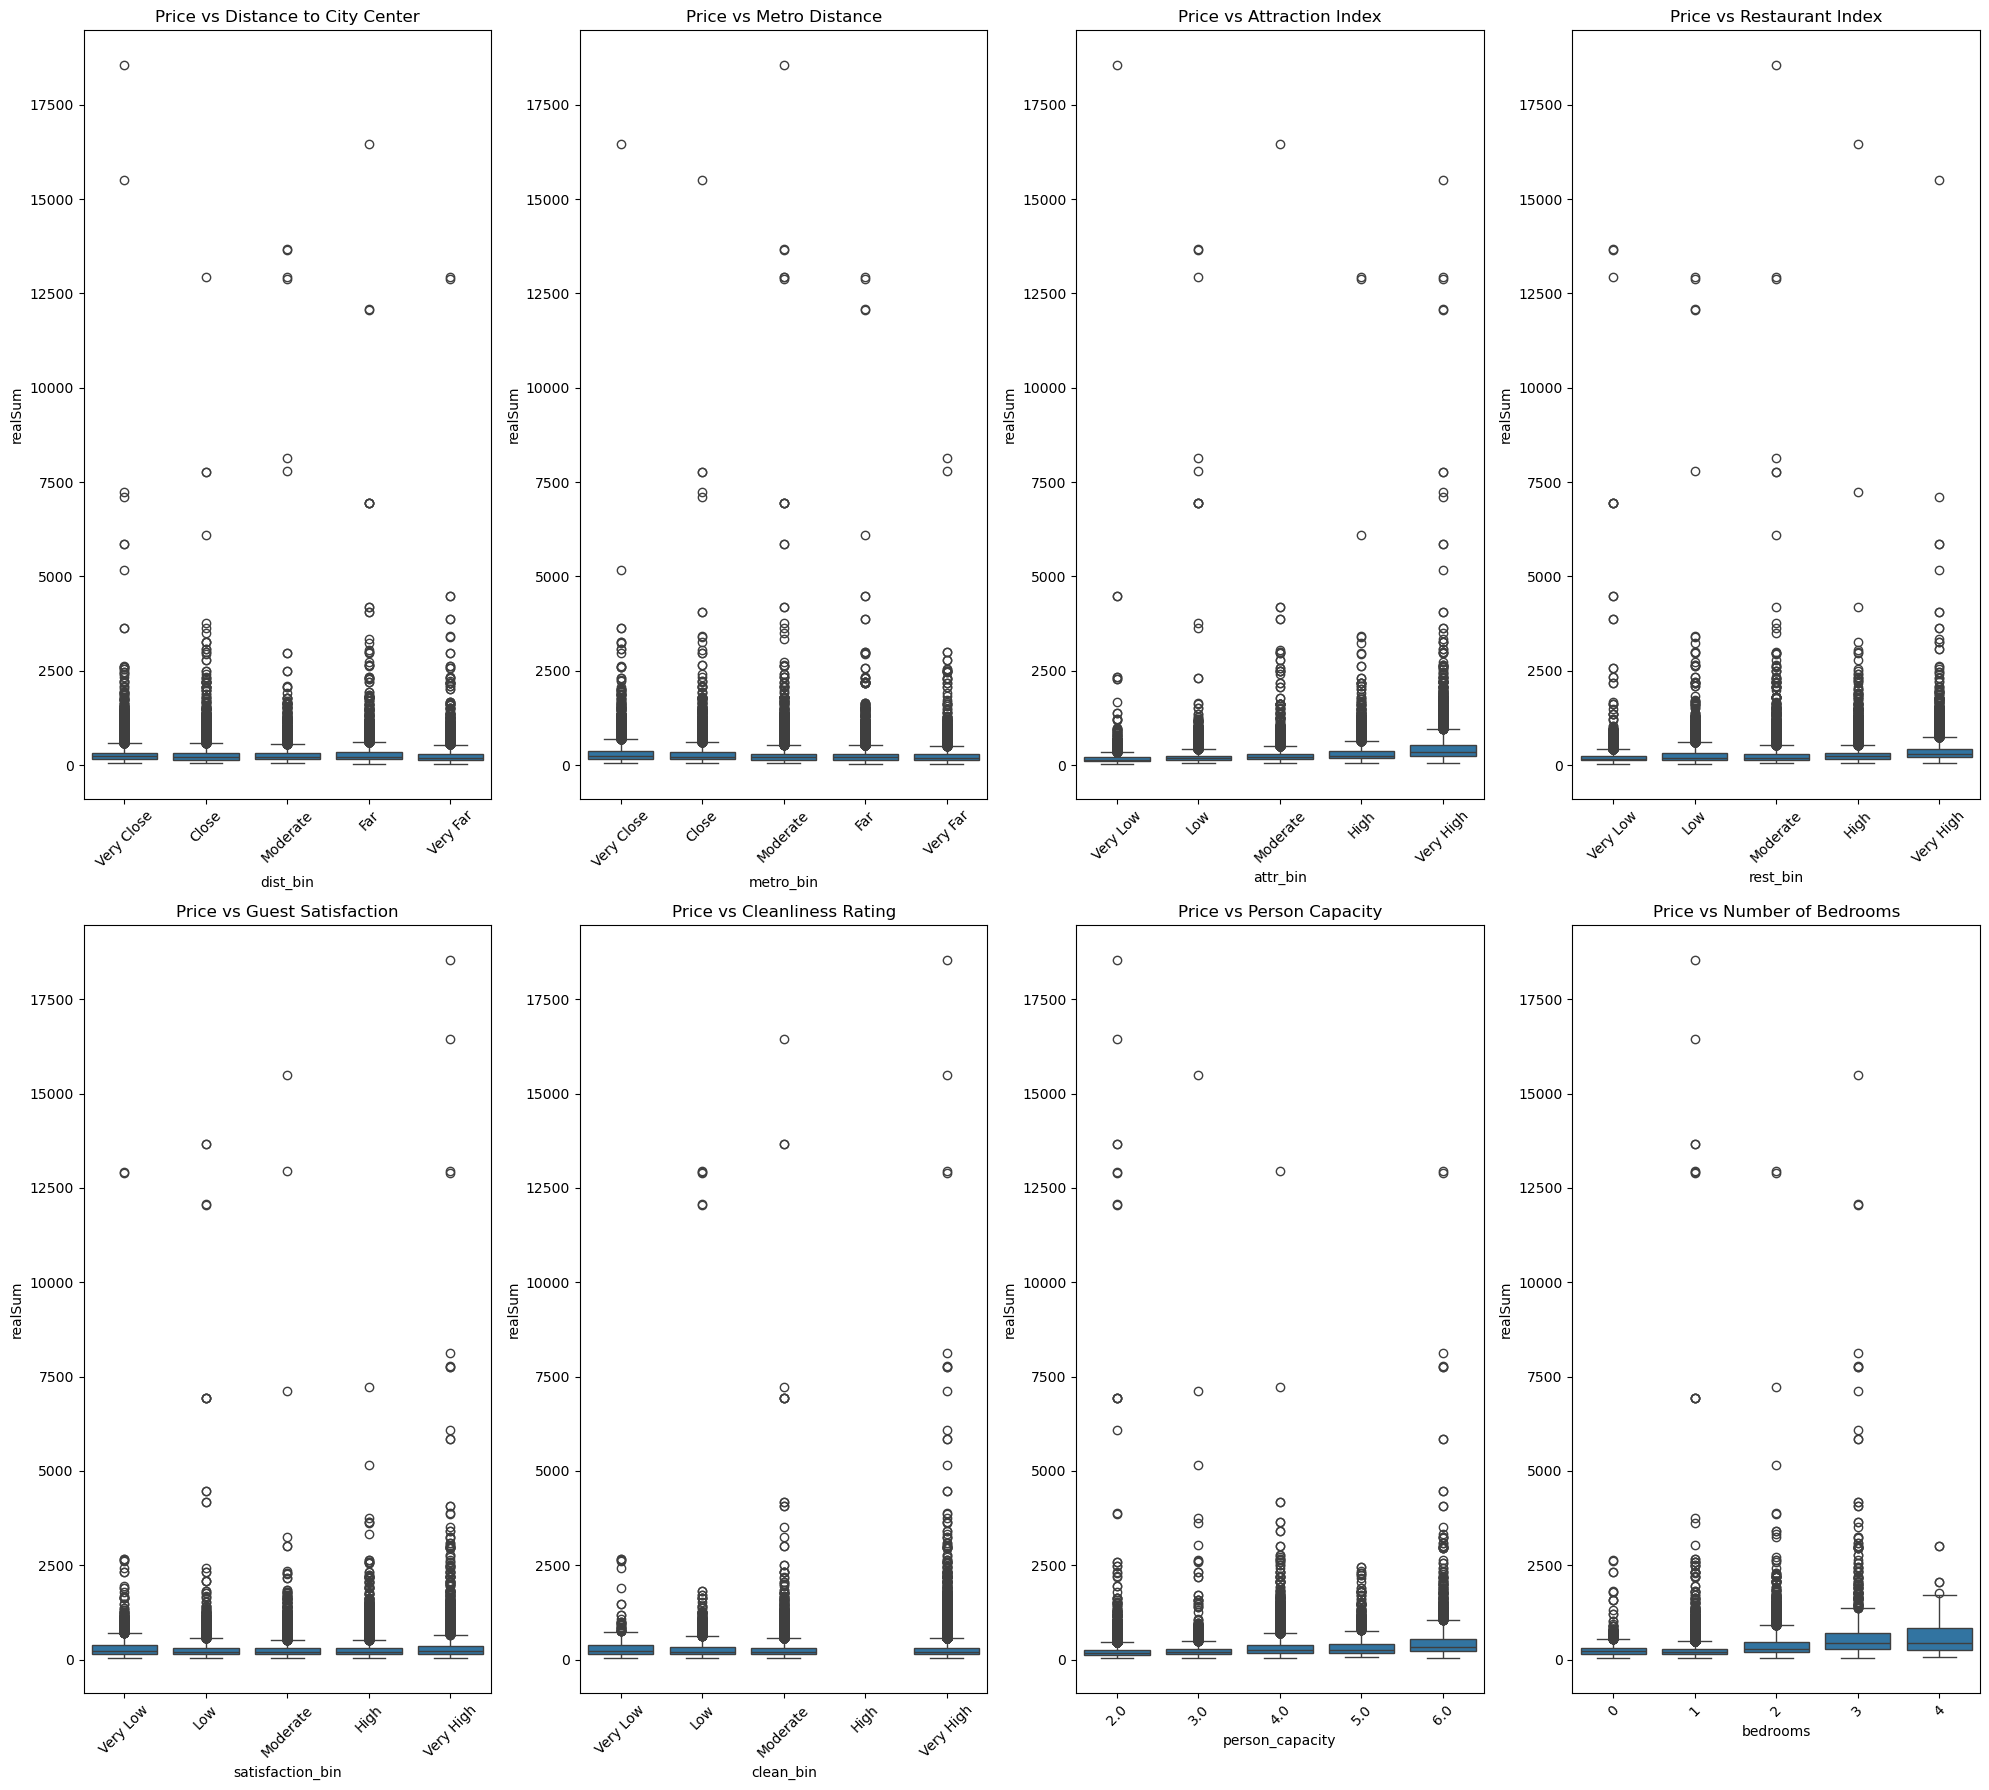

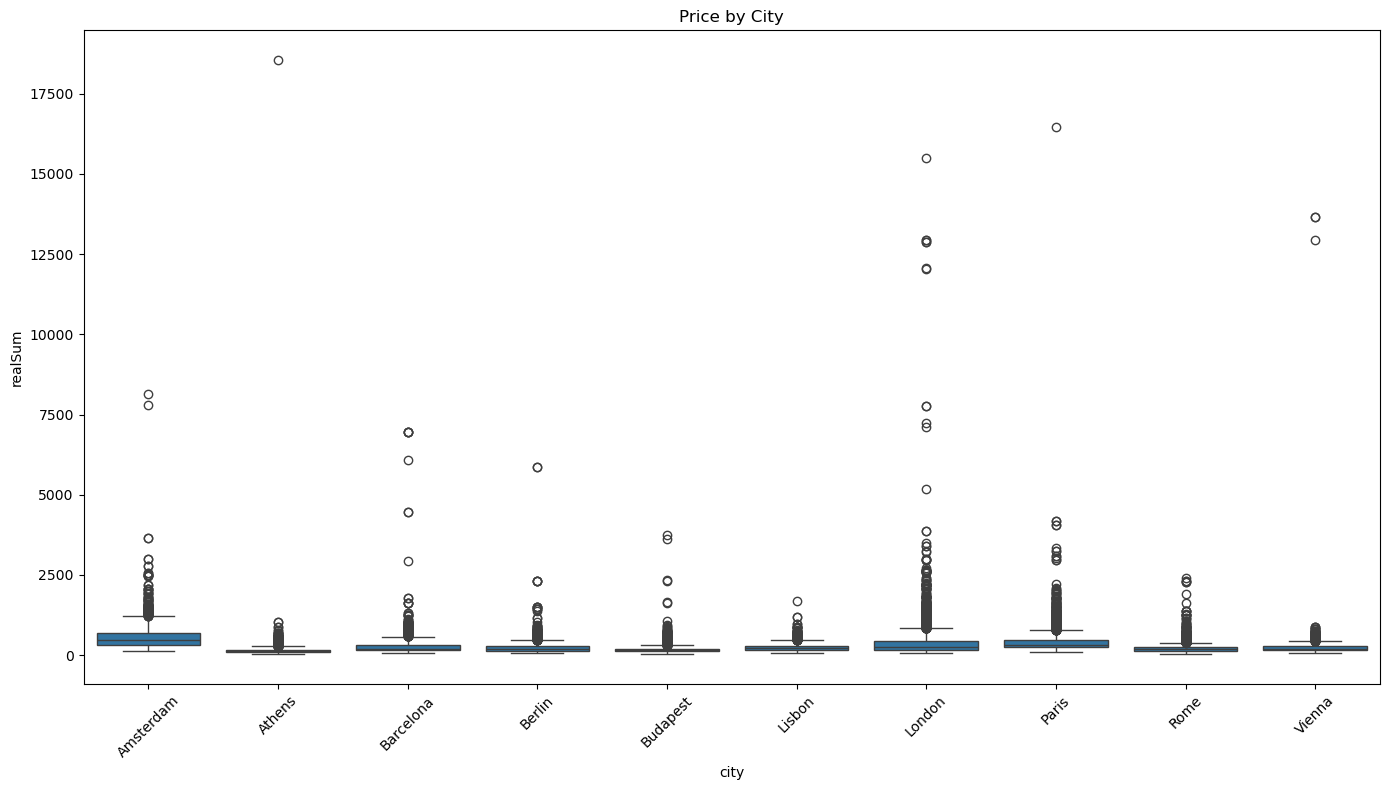

In [43]:

# 5. Create categorical analyses with custom bins for each factor
plt.figure(figsize=(20, 18))

# Distance to city center
plt.subplot(2, 4, 1)
df['dist_bin'] = pd.qcut(df['dist'], 5, labels=["Very Close", "Close", "Moderate", "Far", "Very Far"])
sns.boxplot(x='dist_bin', y='realSum', data=df)
plt.title('Price vs Distance to City Center')
plt.xticks(rotation=45)

# Metro distance
plt.subplot(2, 4, 2)
df['metro_bin'] = pd.qcut(df['metro_dist'], 5, labels=["Very Close", "Close", "Moderate", "Far", "Very Far"])
sns.boxplot(x='metro_bin', y='realSum', data=df)
plt.title('Price vs Metro Distance')
plt.xticks(rotation=45)

# Attraction index normalized
plt.subplot(2, 4, 3)
df['attr_bin'] = pd.qcut(df['attr_index_norm'], 5, labels=["Very Low", "Low", "Moderate", "High", "Very High"])
sns.boxplot(x='attr_bin', y='realSum', data=df)
plt.title('Price vs Attraction Index')
plt.xticks(rotation=45)

# Restaurant index normalized
plt.subplot(2, 4, 4)
df['rest_bin'] = pd.qcut(df['rest_index_norm'], 5, labels=["Very Low", "Low", "Moderate", "High", "Very High"])
sns.boxplot(x='rest_bin', y='realSum', data=df)
plt.title('Price vs Restaurant Index')
plt.xticks(rotation=45)

# Guest satisfaction
plt.subplot(2, 4, 5)
# Using cut() with custom bins based on the distribution
df['satisfaction_bin'] = pd.cut(df['guest_satisfaction_overall'], 
                            bins=[0, 80, 90, 95, 99, 100],
                            labels=["Very Low", "Low", "Moderate", "High", "Very High"],
                            include_lowest=True)
sns.boxplot(x='satisfaction_bin', y='realSum', data=df)
plt.title('Price vs Guest Satisfaction')
plt.xticks(rotation=45)

# Cleanliness rating
plt.subplot(2, 4, 6)
# Using cut() with custom bins based on the distribution
df['clean_bin'] = pd.cut(df['cleanliness_rating'], 
                      bins=[0, 6, 8, 9, 9.5, 10],
                      labels=["Very Low", "Low", "Moderate", "High", "Very High"],
                      include_lowest=True)
sns.boxplot(x='clean_bin', y='realSum', data=df)
plt.title('Price vs Cleanliness Rating')
plt.xticks(rotation=45)

# Person capacity
plt.subplot(2, 4, 7)
sns.boxplot(x='person_capacity', y='realSum', data=df)
plt.title('Price vs Person Capacity')
plt.xticks(rotation=45)

# Bedrooms
plt.subplot(2, 4, 8)
# Limit to common bedroom counts (0-4)
bedroom_df = df[df['bedrooms'] <= 4]
sns.boxplot(x='bedrooms', y='realSum', data=bedroom_df)
plt.title('Price vs Number of Bedrooms')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 6. Analysis by city
plt.figure(figsize=(14, 8))
sns.boxplot(x='city', y='realSum', data=df)
plt.title('Price by City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:

# 7. Multiple regression to see combined impact
X = df[key_factors]
X = sm.add_constant(X)
y = df['realSum']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                realSum   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     823.8
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:40:40   Log-Likelihood:            -3.7054e+05
No. Observations:               51707   AIC:                         7.411e+05
Df Residuals:                   51700   BIC:                         7.412e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

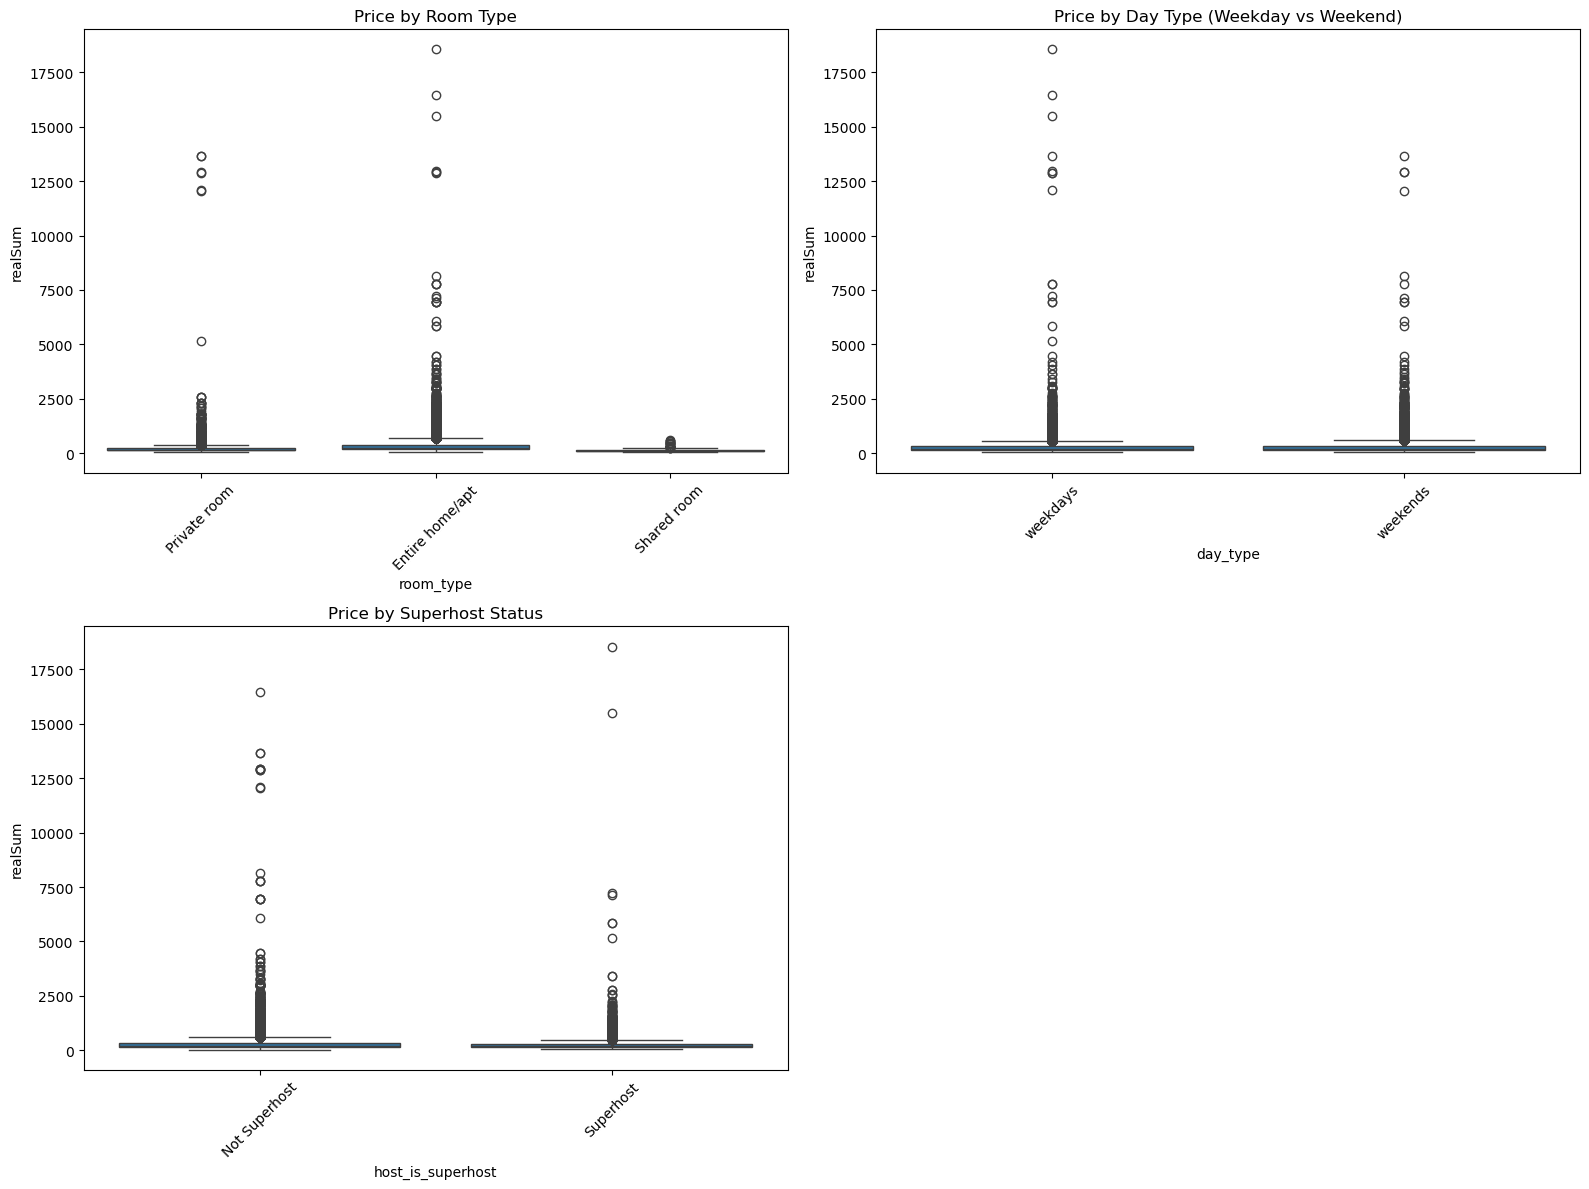

In [50]:
# 8. Categorical variable impact: room_type, day_type, superhost
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='room_type', y='realSum', data=df)
plt.title('Price by Room Type')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='day_type', y='realSum', data=df)
plt.title('Price by Day Type (Weekday vs Weekend)')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.boxplot(x='host_is_superhost', y='realSum', data=df)
plt.title('Price by Superhost Status')
# Get the current tick positions and set both positions and labels
current_ticks = plt.xticks()[0]  # Get current tick positions
plt.xticks(ticks=current_ticks, labels=['Not Superhost', 'Superhost'], rotation=45)

plt.tight_layout()
plt.show()


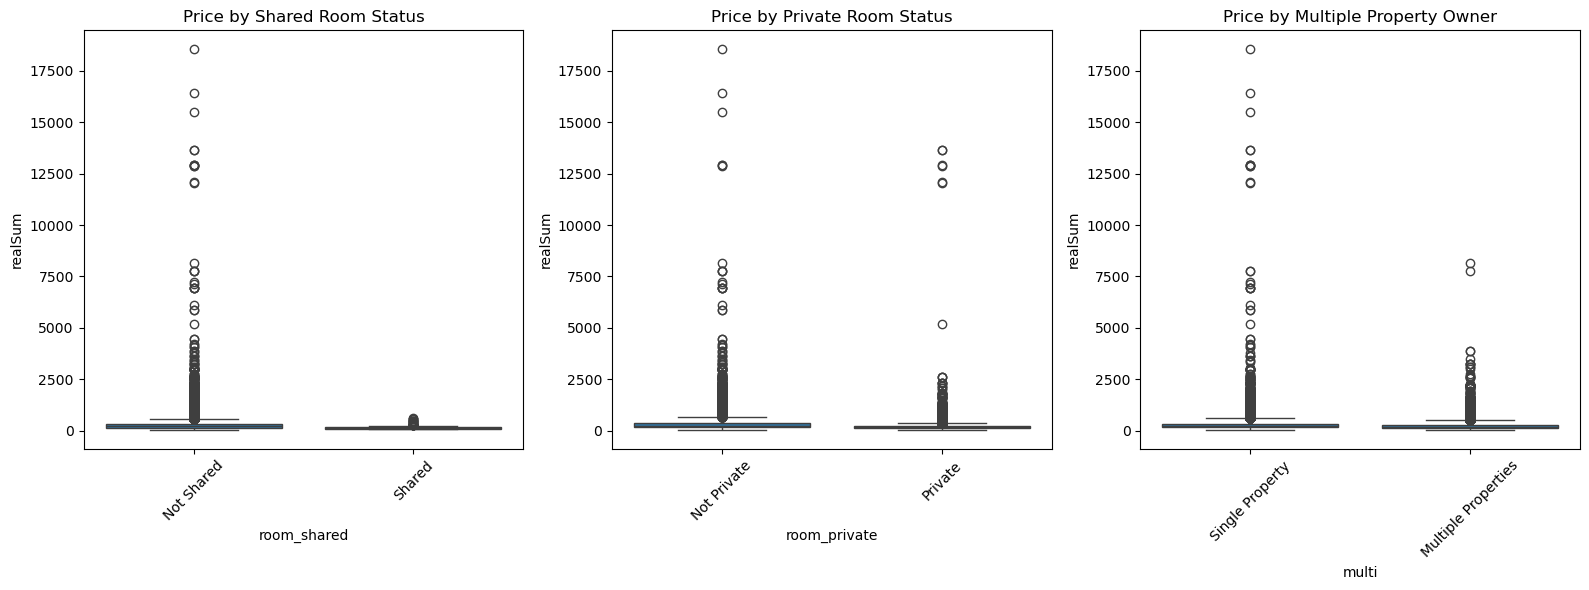

In [51]:
# 9. Room characteristics impact
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='room_shared', y='realSum', data=df)
plt.title('Price by Shared Room Status')
current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks, labels=['Not Shared', 'Shared'], rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='room_private', y='realSum', data=df)
plt.title('Price by Private Room Status')
current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks, labels=['Not Private', 'Private'], rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='multi', y='realSum', data=df)
plt.title('Price by Multiple Property Owner')
current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks, labels=['Single Property', 'Multiple Properties'], rotation=45)

plt.tight_layout()
plt.show()

Business Implications

For Hosts:

    - Location near attractions matters most for pricing power
    - Proximity to metro stations is a significant price factor
    - Improving guest satisfaction scores can justify modest price increases

For Guests:

    - Properties near attractions command significant price premiums
    - Properties far from metro stations tend to be more affordable
    - Cleanliness ratings, while important for the experience, don't seem to drive pricing

For Further Analysis:

    - The low R-squared suggests including other variables like property size, specific amenities, and seasonal factors could improve the model
    - The relationship between distance to city center and price deserves deeper investigation

Price Statistics by City:
                 mean      median         std         min           max  count
city                                                                          
Amsterdam  573.112795  460.244183  430.658406  128.887118   8130.668104   2080
Paris      392.531403  317.597167  330.949745   92.739305  16445.614689   6688
London     362.469256  261.294950  471.357265   54.328653  15499.894165   9993
Barcelona  293.753706  208.299393  355.467888   69.588289   6943.700980   2833
Berlin     244.583752  191.175096  235.329289   64.971487   5857.483407   2484
Vienna     241.582484  208.494028  397.747165   63.576654  13664.305916   3537
Lisbon     238.210479  225.375235  108.973079   70.590994   1681.050657   5763
Rome       205.391950  182.591822  118.618103   46.057092   2418.348023   9027
Budapest   176.513548  152.982093  131.144806   34.779339   3751.233727   4022
Athens     151.744121  127.715417  265.880053   42.884259  18545.450285   5280


/var/folders/50/7ys27s856cj0_7svprhcb3580000gp/T/ipykernel_66276/652805058.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=city_price_stats.index, y=city_price_stats['mean'], palette='viridis')


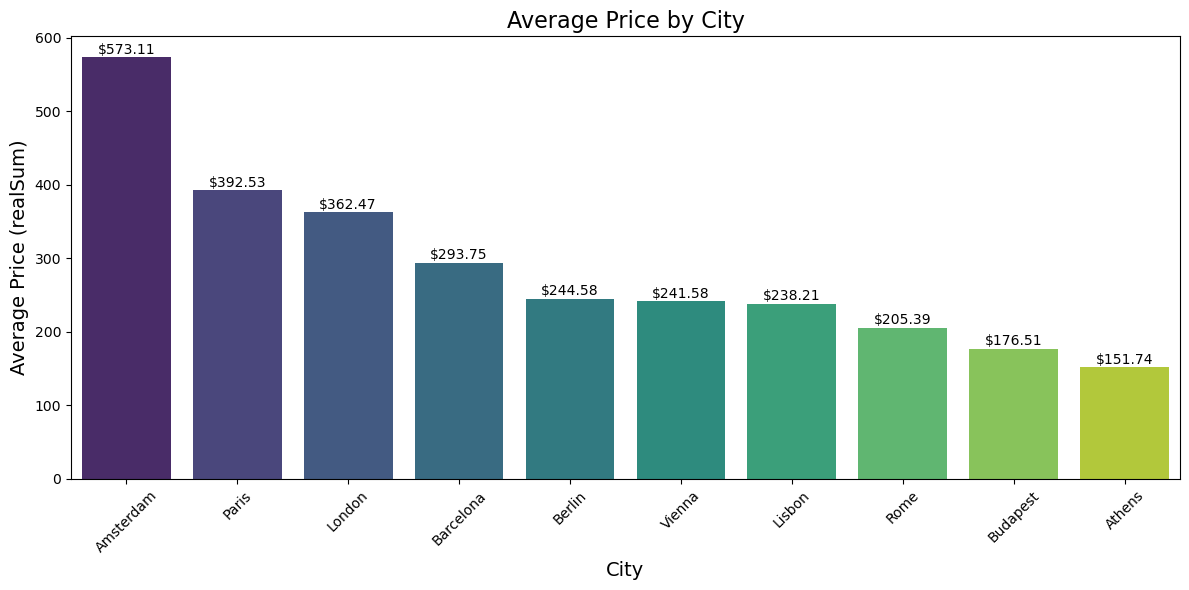

In [52]:
# 1. Calculate average, median, and other statistics by city
city_price_stats = df.groupby('city')['realSum'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).sort_values('mean', ascending=False)
print("Price Statistics by City:")
print(city_price_stats)

# 2. Bar chart of average prices by city
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=city_price_stats.index, y=city_price_stats['mean'], palette='viridis')
plt.title('Average Price by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Price (realSum)', fontsize=14)
plt.xticks(rotation=45)

# Add data labels on top of each bar
for i, v in enumerate(city_price_stats['mean']):
    ax.text(i, v + 5, f"${v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

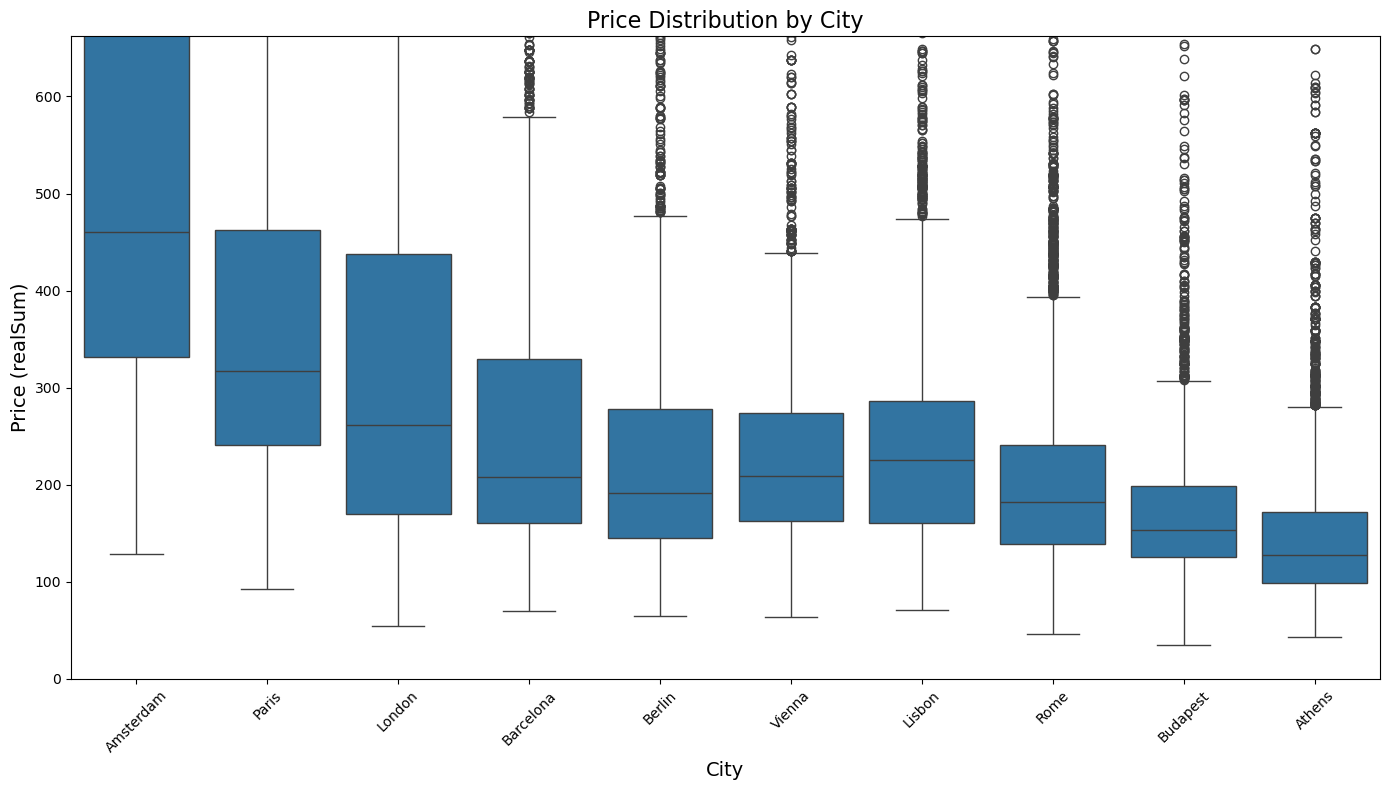

In [55]:
# 3. Distribution of prices by city with boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='city', y='realSum', data=df, order=city_price_stats.index)
plt.title('Price Distribution by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price (realSum)', fontsize=14)
plt.xticks(rotation=45)

# Set y-axis limit to better visualize the main distribution
plt.ylim(0, df['realSum'].quantile(0.95))  # Showing up to 95th percentile
plt.tight_layout()
plt.show()

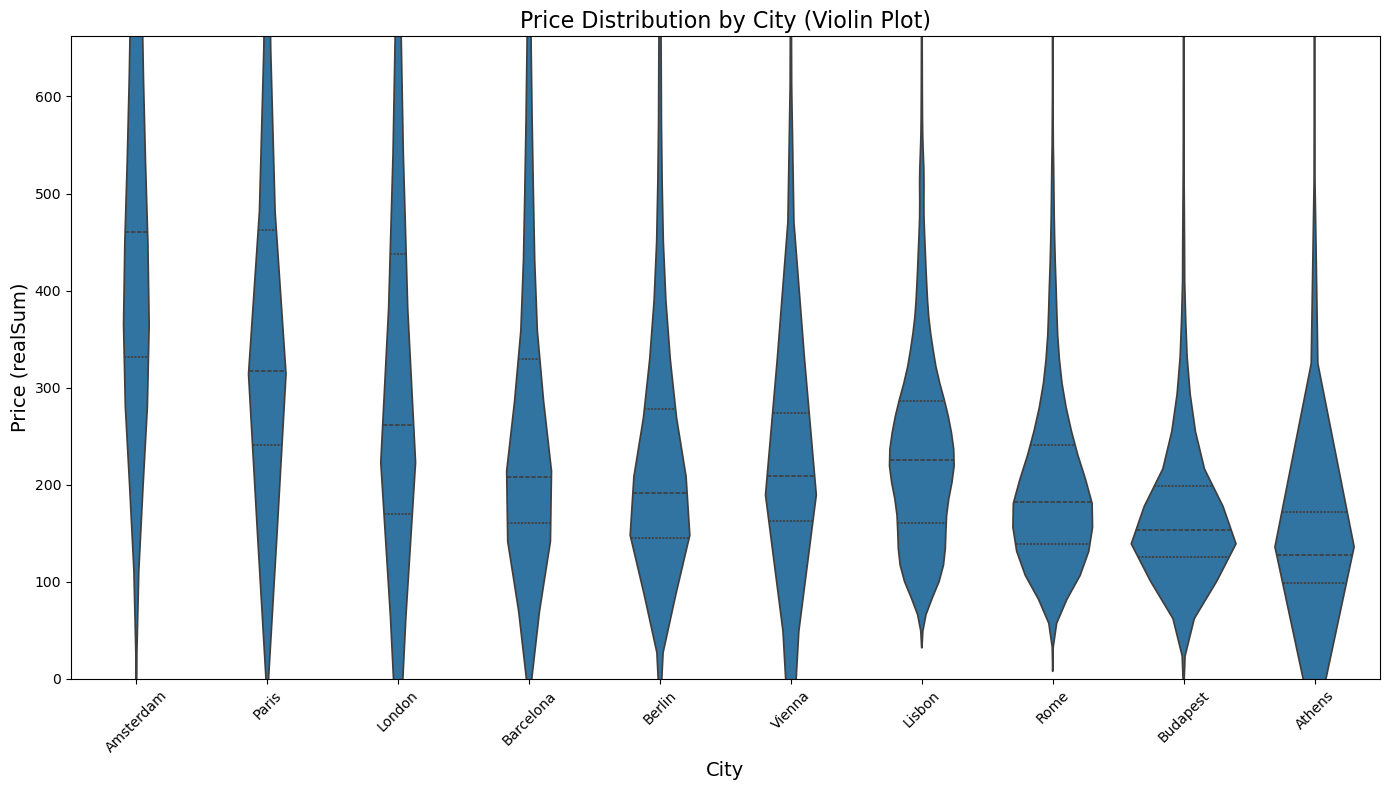

In [56]:
# 4. Violin plots to see the distribution shape better
plt.figure(figsize=(14, 8))
sns.violinplot(x='city', y='realSum', data=df, order=city_price_stats.index, inner='quartile')
plt.title('Price Distribution by City (Violin Plot)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price (realSum)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, df['realSum'].quantile(0.95))
plt.tight_layout()
plt.show()


In [58]:

# 5. Statistical test to see if price differences between cities are significant
import scipy.stats as stats

# ANOVA test to see if there are significant differences between groups
groups = [df[df['city'] == city]['realSum'] for city in df['city'].unique()]
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA test results: F-statistic = {f_stat:.2f}, p-value = {p_value:.10f}")
print(f"The price differences between cities are {'statistically significant' if p_value < 0.05 else 'not statistically significant'}")




ANOVA test results: F-statistic = 605.72, p-value = 0.0000000000
The price differences between cities are statistically significant


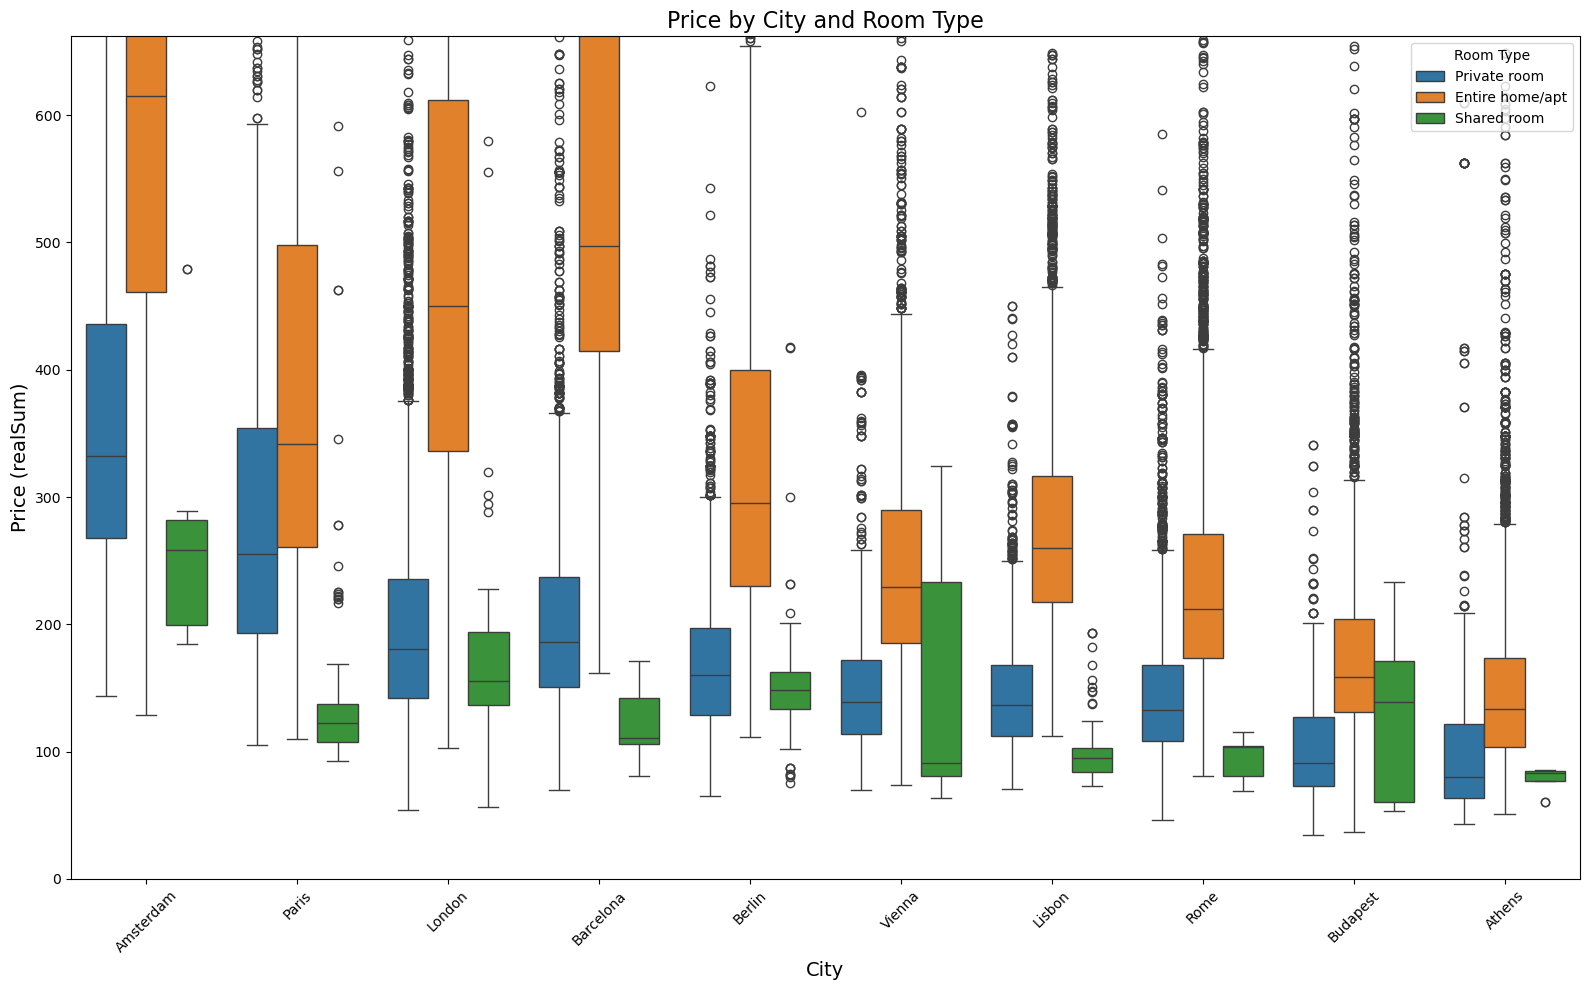

In [59]:
# 6. City price comparison controlling for room type
plt.figure(figsize=(16, 10))
sns.boxplot(x='city', y='realSum', hue='room_type', data=df, order=city_price_stats.index)
plt.title('Price by City and Room Type', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price (realSum)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, df['realSum'].quantile(0.95))
plt.legend(title='Room Type', loc='upper right')
plt.tight_layout()
plt.show()

/var/folders/50/7ys27s856cj0_7svprhcb3580000gp/T/ipykernel_66276/1303559970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=city_price_index.index, y=city_price_index, palette='coolwarm')


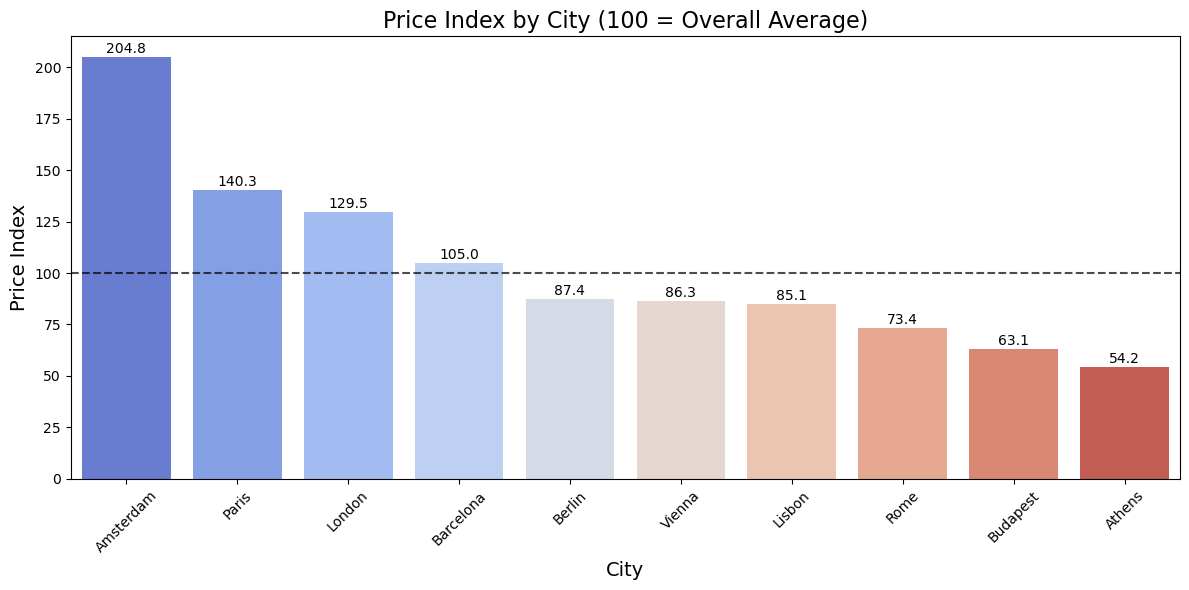

In [60]:
# 7. Calculating price index relative to overall average
overall_avg = df['realSum'].mean()
city_price_index = city_price_stats['mean'] / overall_avg * 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=city_price_index.index, y=city_price_index, palette='coolwarm')
plt.title('Price Index by City (100 = Overall Average)', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price Index', fontsize=14)
plt.xticks(rotation=45)
plt.axhline(y=100, color='black', linestyle='--', alpha=0.7, label='Overall Average')

# Add data labels on top of each bar
for i, v in enumerate(city_price_index):
    ax.text(i, v + 2, f"{v:.1f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()